## Problem: <u> We want to create a neural network capable of detecting the face emotion given the image of the face.</u>
### Using dataset: train-face.csv for training and test-face.csv for testing

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
from PIL import Image
import keras
from keras import Sequential, losses, optimizers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from skimage import io
import imutils

Using TensorFlow backend.


In [3]:
# A Data model to store the data (can be used in the future)
class DataModel:
    """
            DataModel
            not used currently in the program.
    """
    def __init__(self):
        self.items_labels = None
        self.images = []
        self.curated_data = {}
    def add_image(self, image_array):
        self.images.append(image_array)
    def add_labels(self, df):
        self.item_labels = df
    def add_curated_data(self, image, emotion):
        self.curated_data['image'] = image
        self.curated_data['emotion'] = emotion



# Loads the data and returns the image and emotions in a list format
def load_data(number_of_items=10):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "IMFDB_FINAL"
    data = [] 
    curated_data = {"images":[], "emotions":[]}
    for actor_name in os.listdir(path)[:number_of_items]:
        # At the start of the iteration build a data model
        data_model = DataModel()
        if actor_name == ".DS_Store":
            continue
        print ("Going through actor:" + actor_name)
        for movie_folder_name in os.listdir(path+"/"+actor_name):
            print ("Goining through movie: ", movie_folder_name)
            if movie_folder_name == ".DS_Store":
                continue
            for items in os.listdir(path+"/"+actor_name+"/"+movie_folder_name):
                if items == ".DS_Store":
                    continue
                if items.endswith(".txt"):
                    print (items)
                    try:
                        print ("added")
                        df = pd.read_table(path+"/"+actor_name+"/"+movie_folder_name+"/"+items,header=None, engine="c")
                        data_model.add_labels(df) 
                        for image in os.listdir(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"):
                            print (image)
                            if image == ".DS_Store":
                                continue
                            print ("going through image: ", image)
                            for d in df.values:
                                if d[2] == image:  
                                    
                                    im = cv2.imread(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"+"/"+image)
                                    im = cv2.resize(im, (80,80)) # Changing into 80x80X3
                                    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                                    
                                    
                                    data_model.add_curated_data(im, d[11])
                                    curated_data['images'].append(im)
                                    curated_data['emotions'].append(d[11])  # d[11] is where the emotion is there
                    except:
                        df = None                    
            data.append(data_model) # Save all the data

    return curated_data


# Test an image
def test_image(image_url):
    """
        image_url -> A string form of the image url
        prints the predicted emotion of the image
    """
    img = imutils.url_to_image(image_url)
    img = cv2.resize(img, (80,80))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(img)
    prediction = np.argmax(model.predict(img.reshape(1,80,80,1)))
    print ( "The image is: ", get_emotion_from_class(prediction))
                    

In [4]:
# Loading the data
data = load_data(number_of_items=5)

Going through actor:SureshGopi
Goining through movie:  InHariharNagar
InHariharNagar.txt
added
Sureshgopi_97.jpg
going through image:  Sureshgopi_97.jpg
Sureshgopi_40.jpg
going through image:  Sureshgopi_40.jpg
Sureshgopi_54.jpg
going through image:  Sureshgopi_54.jpg
Sureshgopi_68.jpg
going through image:  Sureshgopi_68.jpg
Sureshgopi_69.jpg
going through image:  Sureshgopi_69.jpg
Sureshgopi_55.jpg
going through image:  Sureshgopi_55.jpg
Sureshgopi_41.jpg
going through image:  Sureshgopi_41.jpg
Sureshgopi_96.jpg
going through image:  Sureshgopi_96.jpg
Sureshgopi_82.jpg
going through image:  Sureshgopi_82.jpg
Sureshgopi_94.jpg
going through image:  Sureshgopi_94.jpg
Sureshgopi_80.jpg
going through image:  Sureshgopi_80.jpg
Sureshgopi_57.jpg
going through image:  Sureshgopi_57.jpg
Sureshgopi_43.jpg
going through image:  Sureshgopi_43.jpg
Sureshgopi_42.jpg
going through image:  Sureshgopi_42.jpg
Sureshgopi_56.jpg
going through image:  Sureshgopi_56.jpg
Sureshgopi_81.jpg
going through ima

SureshGopy_76.jpg
going through image:  SureshGopy_76.jpg
SureshGopy_181.jpg
going through image:  SureshGopy_181.jpg
SureshGopy_220.jpg
going through image:  SureshGopy_220.jpg
SureshGopy_234.jpg
going through image:  SureshGopy_234.jpg
SureshGopy_235.jpg
going through image:  SureshGopy_235.jpg
SureshGopy_180.jpg
going through image:  SureshGopy_180.jpg
SureshGopy_143.jpg
going through image:  SureshGopy_143.jpg
SureshGopy_38.jpg
going through image:  SureshGopy_38.jpg
SureshGopy_252.jpg
going through image:  SureshGopy_252.jpg
SureshGopy_253.jpg
going through image:  SureshGopy_253.jpg
SureshGopy_11.jpg
going through image:  SureshGopy_11.jpg
SureshGopy_131.jpg
going through image:  SureshGopy_131.jpg
SureshGopy_127.jpg
going through image:  SureshGopy_127.jpg
SureshGopy_133.jpg
going through image:  SureshGopy_133.jpg
SureshGopy_8.jpg
going through image:  SureshGopy_8.jpg
SureshGopy_251.jpg
going through image:  SureshGopy_251.jpg
SureshGopy_250.jpg
going through image:  SureshGop

going through image:  SureshGopi_12.jpg
SureshGopi_7.jpg
going through image:  SureshGopi_7.jpg
SureshGopi_49.jpg
going through image:  SureshGopi_49.jpg
SureshGopi_60.jpg
going through image:  SureshGopi_60.jpg
SureshGopi_62.jpg
going through image:  SureshGopi_62.jpg
SureshGopi_59.jpg
going through image:  SureshGopi_59.jpg
Going through actor:Simran
Goining through movie:  .DS_Store
Goining through movie:  KalisundamRaa
KalisundamRaa.txt
added
Simran_100.jpg
going through image:  Simran_100.jpg
Simran_114.jpg
going through image:  Simran_114.jpg
Simran_25.jpg
going through image:  Simran_25.jpg
Simran_128.jpg
going through image:  Simran_128.jpg
Simran_262.jpg
going through image:  Simran_262.jpg
Simran_4.jpg
going through image:  Simran_4.jpg
Simran_129.jpg
going through image:  Simran_129.jpg
Simran_24.jpg
going through image:  Simran_24.jpg
Simran_30.jpg
going through image:  Simran_30.jpg
Simran_18.jpg
going through image:  Simran_18.jpg
Simran_115.jpg
going through image:  Simr

Simran_15.jpg
going through image:  Simran_15.jpg
Simran_118.jpg
going through image:  Simran_118.jpg
Simran_124.jpg
going through image:  Simran_124.jpg
Simran_29.jpg
going through image:  Simran_29.jpg
Simran_131.jpg
going through image:  Simran_131.jpg
Simran_28.jpg
going through image:  Simran_28.jpg
Simran_125.jpg
going through image:  Simran_125.jpg
Simran_119.jpg
going through image:  Simran_119.jpg
Simran_14.jpg
going through image:  Simran_14.jpg
Goining through movie:  NarasimhaNaidu
NarasimhaNaidu.txt
added
Simran_100.jpg
going through image:  Simran_100.jpg
Simran_114.jpg
going through image:  Simran_114.jpg
Simran_19.jpg
going through image:  Simran_19.jpg
Simran_5.jpg
going through image:  Simran_5.jpg
Simran_4.jpg
going through image:  Simran_4.jpg
Simran_24.jpg
going through image:  Simran_24.jpg
Simran_30.jpg
going through image:  Simran_30.jpg
Simran_115.jpg
going through image:  Simran_115.jpg
Simran_101.jpg
going through image:  Simran_101.jpg
Simran_6.jpg
going thr

Simran_110.jpg
going through image:  Simran_110.jpg
Simran_104.jpg
going through image:  Simran_104.jpg
Simran_21.jpg
going through image:  Simran_21.jpg
Simran_35.jpg
going through image:  Simran_35.jpg
Simran_138.jpg
going through image:  Simran_138.jpg
Simran_91.jpg
going through image:  Simran_91.jpg
Simran_163.jpg
going through image:  Simran_163.jpg
Simran_52.jpg
going through image:  Simran_52.jpg
Simran_46.jpg
going through image:  Simran_46.jpg
Simran_200.jpg
going through image:  Simran_200.jpg
Simran_47.jpg
going through image:  Simran_47.jpg
Simran_53.jpg
going through image:  Simran_53.jpg
Simran_176.jpg
going through image:  Simran_176.jpg
Simran_162.jpg
going through image:  Simran_162.jpg
Simran_189.jpg
going through image:  Simran_189.jpg
Simran_84.jpg
going through image:  Simran_84.jpg
Simran_90.jpg
going through image:  Simran_90.jpg
Simran_86.jpg
going through image:  Simran_86.jpg
Simran_92.jpg
going through image:  Simran_92.jpg
Simran_79.jpg
going through image:

tenniskrishna_22.jpg
going through image:  tenniskrishna_22.jpg
tenniskrishna_147.jpg
going through image:  tenniskrishna_147.jpg
tenniskrishna_184.jpg
going through image:  tenniskrishna_184.jpg
tenniskrishna_191.jpg
going through image:  tenniskrishna_191.jpg
tenniskrishna_185.jpg
going through image:  tenniskrishna_185.jpg
tenniskrishna_152.jpg
going through image:  tenniskrishna_152.jpg
tenniskrishna_146.jpg
going through image:  tenniskrishna_146.jpg
tenniskrishna_23.jpg
going through image:  tenniskrishna_23.jpg
tenniskrishna_35.jpg
going through image:  tenniskrishna_35.jpg
tenniskrishna_21.jpg
going through image:  tenniskrishna_21.jpg
tenniskrishna_8.jpg
going through image:  tenniskrishna_8.jpg
tenniskrishna_178.jpg
going through image:  tenniskrishna_178.jpg
tenniskrishna_150.jpg
going through image:  tenniskrishna_150.jpg
tenniskrishna_144.jpg
going through image:  tenniskrishna_144.jpg
tenniskrishna_187.jpg
going through image:  tenniskrishna_187.jpg
tenniskrishna_192.jpg


Madhu_32.jpg
going through image:  Madhu_32.jpg
Madhu_170.jpg
going through image:  Madhu_170.jpg
Madhu_164.jpg
going through image:  Madhu_164.jpg
Madhu_158.jpg
going through image:  Madhu_158.jpg
Madhu_172.jpg
going through image:  Madhu_172.jpg
Madhu_166.jpg
going through image:  Madhu_166.jpg
Madhu_18.jpg
going through image:  Madhu_18.jpg
Madhu_24.jpg
going through image:  Madhu_24.jpg
Madhu_31.jpg
going through image:  Madhu_31.jpg
Madhu_25.jpg
going through image:  Madhu_25.jpg
Madhu_173.jpg
going through image:  Madhu_173.jpg
Madhu_114.jpg
going through image:  Madhu_114.jpg
Madhu_100.jpg
going through image:  Madhu_100.jpg
Madhu_128.jpg
going through image:  Madhu_128.jpg
Madhu_95.jpg
going through image:  Madhu_95.jpg
Madhu_94.jpg
going through image:  Madhu_94.jpg
Madhu_80.jpg
going through image:  Madhu_80.jpg
Madhu_101.jpg
going through image:  Madhu_101.jpg
Madhu_115.jpg
going through image:  Madhu_115.jpg
Madhu_117.jpg
going through image:  Madhu_117.jpg
Madhu_9.jpg
goin

Madhu_108.jpg
going through image:  Madhu_108.jpg
Madhu_120.jpg
going through image:  Madhu_120.jpg
Madhu_134.jpg
going through image:  Madhu_134.jpg
Madhu_122.jpg
going through image:  Madhu_122.jpg
Madhu_136.jpg
going through image:  Madhu_136.jpg
Madhu_74.jpg
going through image:  Madhu_74.jpg
Madhu_48.jpg
going through image:  Madhu_48.jpg
Madhu_49.jpg
going through image:  Madhu_49.jpg
Madhu_1.jpg
going through image:  Madhu_1.jpg
Madhu_61.jpg
going through image:  Madhu_61.jpg
Madhu_137.jpg
going through image:  Madhu_137.jpg
Madhu_123.jpg
going through image:  Madhu_123.jpg
Madhu_127.jpg
going through image:  Madhu_127.jpg
Madhu_133.jpg
going through image:  Madhu_133.jpg
Madhu_59.jpg
going through image:  Madhu_59.jpg
Madhu_65.jpg
going through image:  Madhu_65.jpg
Madhu_70.jpg
going through image:  Madhu_70.jpg
Madhu_58.jpg
going through image:  Madhu_58.jpg
Madhu_132.jpg
going through image:  Madhu_132.jpg
Madhu_126.jpg
going through image:  Madhu_126.jpg
Madhu_118.jpg
going 

KarunaBenerjee_82.jpg
going through image:  KarunaBenerjee_82.jpg
KarunaBenerjee_96.jpg
going through image:  KarunaBenerjee_96.jpg
KarunaBenerjee_58.jpg
going through image:  KarunaBenerjee_58.jpg
KarunaBenerjee_70.jpg
going through image:  KarunaBenerjee_70.jpg
KarunaBenerjee_64.jpg
going through image:  KarunaBenerjee_64.jpg
KarunaBenerjee_127.jpg
going through image:  KarunaBenerjee_127.jpg
KarunaBenerjee_65.jpg
going through image:  KarunaBenerjee_65.jpg
KarunaBenerjee_126.jpg
going through image:  KarunaBenerjee_126.jpg
KarunaBenerjee_71.jpg
going through image:  KarunaBenerjee_71.jpg
KarunaBenerjee_59.jpg
going through image:  KarunaBenerjee_59.jpg
KarunaBenerjee_98.jpg
going through image:  KarunaBenerjee_98.jpg
KarunaBenerjee_118.jpg
going through image:  KarunaBenerjee_118.jpg
KarunaBenerjee_124.jpg
going through image:  KarunaBenerjee_124.jpg
KarunaBenerjee_67.jpg
going through image:  KarunaBenerjee_67.jpg
KarunaBenerjee_73.jpg
going through image:  KarunaBenerjee_73.jpg
Ka

In [5]:
# Extracting the features and labels
encoder = LabelEncoder()
encoder.fit(data['emotions'])

LabelEncoder()

In [6]:
# Label Encoding all the emotion data
data['emotions'] = encoder.transform(data['emotions'])

In [7]:
# All the classes recorded
all_the_classes = encoder.classes_
mapping = {0: 'ANGER',
 1: 'ANGER NONE',
 2: 'DISGUST',
 3: 'FEAR',
 4: 'HAPPINESS',
 5: 'NEUTRAL',
 6: 'SADNESS',
 7: 'SURPRISE'}

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
        return mapping.get(class_number)
    else:
        return -1 # No such class

In [8]:
# Extracting features and labels
features = np.array(data['images'])
labels = data['emotions']

In [9]:
print ("Shape of features: ", features.shape)
print ("Shape of labels: ", labels.shape)

Shape of features:  (1505, 80, 80)
Shape of labels:  (1505,)


In [10]:
# Changing
labels = to_categorical(labels, num_classes=len(mapping))

In [11]:
# Building model
model = Sequential()
model.add(Conv2D(16, kernel_size=5, input_shape=(80,80,1), activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=5, activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(mapping), activation="softmax"))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 76, 76, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4624)              0         
__________

In [13]:
model.compile(optimizer=optimizers.adam(lr=0.001), loss=keras.losses.categorical_crossentropy, metrics=['acc'])

In [14]:
# Splitting
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)

In [15]:
tensorboard = TensorBoard()
earlystopping = EarlyStopping(patience=3)

In [16]:
# Scaling
features_train = features_train.astype("float32")
features_test = features_test.astype("float32")

In [17]:
features_train = features_train / 1/255
features_test = features_test / 1/255

In [18]:
features_train = features_train.reshape(len(features_train), 80, 80, 1)
features_test = features_test.reshape(len(features_test), 80, 80, 1)

In [19]:
# Training
model.fit(features_train, labels_train, epochs=100, batch_size=32, callbacks=[tensorboard,earlystopping], validation_data=(features_test, labels_test))

Train on 1128 samples, validate on 377 samples
Epoch 1/100
1128/1128 [==============================] - 9s 8ms/step - loss: 1.9853 - acc: 0.2624 - val_loss: 1.9484 - val_acc: 0.3236
Epoch 2/100
1128/1128 [==============================] - 8s 7ms/step - loss: 1.8895 - acc: 0.3200 - val_loss: 1.8795 - val_acc: 0.3236
Epoch 3/100
1128/1128 [==============================] - 8s 7ms/step - loss: 1.8584 - acc: 0.3262 - val_loss: 1.9255 - val_acc: 0.3236
Epoch 4/100
1128/1128 [==============================] - 9s 8ms/step - loss: 1.8284 - acc: 0.3218 - val_loss: 1.8085 - val_acc: 0.3236
Epoch 5/100
1128/1128 [==============================] - 8s 7ms/step - loss: 1.7956 - acc: 0.3333 - val_loss: 1.8039 - val_acc: 0.3236
Epoch 6/100
1128/1128 [==============================] - 8s 7ms/step - loss: 1.7873 - acc: 0.3307 - val_loss: 1.8054 - val_acc: 0.3236
Epoch 7/100
1128/1128 [==============================] - 8s 7ms/step - loss: 1.7680 - acc: 0.3484 - val_loss: 1.7843 - val_acc: 0.3236
Epoch 8/

In [20]:
model.save("emotionv1.1.h5") # Saving the model

The image is:  HAPPINESS


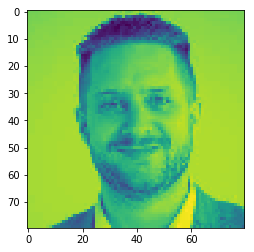

In [21]:
test_image("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEBUQEhAWFhUXFRUWFxYVFRcWFRUXFRUXFxUVFRUYHSggGBolGxUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lICUvLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQQFAgMGBwj/xABCEAABAwIDBQUFBAgFBQEAAAABAAIRAyEEEjEFQVFhcQYigZGhEzKxwfBCUtHhFCMzYnKCsvEkNHOSwgcVU6LDFv/EABkBAQADAQEAAAAAAAAAAAAAAAABAgMEBf/EACQRAQEAAgICAQQDAQAAAAAAAAABAhEDEiExQSIyUWEEE3FC/9oADAMBAAIRAxEAPwD0UBMBMBOEChNOE0CThNCAQmhAkQmqjbPaOhhXBj3S8gnKCAYgm5PIH6KC2UHF7Xw9J2R9Vodbu6uvB0HIg9F572u7duLgMNUhuW9vtTBB4jf48lwFbalWo8VKr3OcXFxc4kuNgBc9IVbkeX0BitsUKdI1jUGUZt8HM0wWEG4dNoKh1O1mBaCTXHdbmOpgddJ1svBztCp3jmMG5EmCTAn0HpwWt+JcWkG4JE+At5Qo7J1Xsdb/AKj4UOAbTeRAMmG66CONif7hW7e12DhpNS7mh2VsucAbjMALGLxrC8HLpMnlY6ACwnibC3K62NxDzYGBFzMADgnao096wHabCVpy1gI+8Q2RMAt46blbU3hwkGQd4Xz1g4b33OJtAmzesTLukR1XZdnu3DqADHML2C0zBA4aXjW6TIeqpLncB20wlV2TvMMA94A66+6SYG87pvC6NpBEi4Oh4q+woRCaEGMJQs0oQYwlCyhKEGMJQs4ShAoSWUIQCyhATQCE0QgE0JokkEwmud7a4l1PDmKwZnlsEhpMj7Jvpv5E6JRq7Qbfa2m8Uan60DM3vBoaAbWce+TBtey8j7Sbedi3B7mND8pBcyQHkkd4tPK0dFCxJcTfU/L6laqOGLp5a/BZXJMxR3ST1HrK1mmSfJW9PAyCIuBPwW2ngL6W47tRH4qndp0VdRm4dD42HwRQpRc+AM3dv8JhXj9kul1tS2PWFvOwnQCBvB6an8PJO6em1LQwjSAXE7yRxG7zut/6Lvy9G8Tz5QPQ9Fef9ndDYbAmSeEmRHhZbDgXFgZljMYNtGWtzJAEnrxVbmmcajp4YmHHjMkm86WG6Tp+K3MwziJB3ax8Bu6BXjdm6xxETaTvcdwa0GAI5wbrfTw7BczA92xk/vHfJ3N4ear3T0VeFzDK2oXlrdGgyTJkzNhx4A810mwdv+wLg17nC0NL5AiZBbmIuI92IOhiyqqmDFRuYmGmw3l0bxx66cJ1TbswNZApgM1kk5ndACJ6mVfHNllg9XwWNp1mhzHAyAYkSJ3EKRC4HshtEMrMoyYMgNkmCRz6Lv4XRjdxQklkkpQSSySQYohZJIEhOE0CTQmgITQmESSaaEFB2rx9SnTyU6gpnKXPfqWtGjWtkS5xneIgryHE4x2If36j3Ee6Xmdb2On1vXp/bvAPqMflJGakQI+8w5gCeBleOVtpOO86AQdLctFnmT2ta+Ehua263ONRy19eF9+FwpcCdJEX0ndCy7O4N9ZuZ2m7QeUCNw3LqMNggLwueujHHamobOe4hwbuINtZ1/FWWE2CYggR9fXiryhTCltaq7dE44r8LsYN/NWNLZrDqFIotUljE2t1kR6ezGDcEP2VTO5TwiE2rpWnZDDuUHE7CB3aeXT1XRtatuRNbRXn20cDUonOb84kwNGtEWXNbQ7Q1i6MgDeEXj63L1vH4MPYRC8529sUyXAepn1UzwyyjnKG06rKrajXQQ4OF4FiLaQOi96oPzNDiIJAMcJC8Cw2A/xFMRPeGYcQLn4L33De43oPguji9OfOeWcIWSS1VYohOEIMUQnCIRBQhOEIBCaESE0JoBCaEFN2tH+EqOGoafUQvBG4XNVIGkzpFjuAX0H2gaDhqs6ZHHyBXi2y8LPeO87+qy5LpbCeXXbDw4ZRaIVgxkrXgqf6sKbRbC5668I2U2KS1i00zJUhgVG7ZSapbGrVTapMK0iLTazkswxYtKzBCtpSnlWSQcslCtY5bFc3tTDBxM/XiurYyyqMZTvKnSled7SwfsqgeLEEHWTE+q9XwlQPptcNC0EeIXF7ZwuZh4eGv4q97F4guwwYTdhLecahacV1dMeSfK+SWSS6GRJLJJBihZJIBCaEQxTQmiRCaEwgEITQUPbitkwNXmA3zIXnOzqMAWiF3/8A1A/yccXtXD4Siufl9tMHQ7P91SgFowbMreAUym1Y104HTapFMIptW5gUabSt1IFbXmAlTdC2Og6K0RfbVTCkMppNMLex1lM0raQprJrFlnHFI1RxCtqM9trVX42nqp1Mg6IrU5ClSuaxNGQR9dVh2X7leozc4A+X91PxVG6iYUZcQx3UdZVcPGURlPpdMksoSXW5ySWSSDFCaEChNNCDFNCEDQhNAIQmg5zt42cL/O1cjsylJaF2/bCjmwjraEH1XI7Jd3gufl+5rxrcgAX0Cj1NqZJJYSOIW+qJChmoxmpvNvyCxyunTgijtBUd7jPNp+XzU/BbZc495voo2I2rTb3XPa08CYP+0SVFdiQ4TTqMqEata4teByDtfGFT6ms06MY+TH9lOw9WYuuJpbTGaCSOREEciCun2XXBAKiW7X1FniC7cFGrPcWxmg9VZucC2Vze18W4SBroOA/FRnuIx8sHU67pAqxfifkrDA0KgHeqZvT4lcli3VaRmHuIaHXL3uOYkABjXADTRXOCr1xnccpa2DLHOa5wM6MfLZtpqrziz1tneXj7dfl1uFtYKY0rn9l7Sz2IN9CWlh6EH4iyvWPkLTDLbLPHVQ8Y0T6qtyfrGdfmrTaAgSoVGk5z2OaNLpvyr1ti6SQJ3+ia65d+nNZZdVihNClDFCaSATQhBimhCkNCE1AEIQgou0O1A1j6fsi+0G8RK4/Y0mpwsr7bTHNxZv3XNmN3Oyh4NjTUztFi0+c3XHllcsvLr/rmOMsSauioMXQq1HHI/LaJAlwH7vCePJdG9s2KhuwYmWkgqlaYzw5/FbJa4ANblOQtcZc1x35gQDJufRWmz8EGhwePaTTp0wHEyBTEAl0STulTRRd94eX5rL2JjU/AeQVpy5a18J/pw3215cptLCPD4Lh+6JzOAnQu1I5nn4dRsZ0MCjV8G0Sd/FbdnhU+Ws9uqwbswhV21cG43E6WiLeenUKbs8WU0skKfatvWuRGGzEZwbSBIJtvE+XkrbC4ekLhoB1sA2evFTamH5LAUDxKfV+U3V8s9TYBTKErRRoqdSYryMcvArslpHJLBMDWNbxG5bKtgeihbMxRNibWATKyWK4y2U9nUsrnibSD471NWNKnBdzKzW3Bj1wZfyMu2e/8JJNC2YEkmhAJJoQYppJqQJpJqAIQmgpe0GDBLK29sg9CPxXG7O2gXYt1Mm0WHBd9tprjh6gbrlsvMdn0nUqxfUEFzmEfw3B6ahcnNNZyu3hu+K7+HXnVZNYhoupDQq1fBr9ksHUt5U1jVW7VxQa0wsssm+M2rNo40NtBK34Nmij4Wmx1P2jyBxndBVps6pTdBaQRxBkHyUyw1qrjCNgBS3yscI+0bkVMeA4DKTzi34q+5pld2odbEOab6KThqwdqteJpB821VbQqOpvyu03FY7ywv6a9ZlP26NrQt7GiFDw9SVKa5dOOcrlyxYYn3T0VdhKRIbGrZBPKbKwxJ7h6LTslsMJOuY/Gyizdhjl18pZSTKF1yajjt3dkkmhSgkk0IBCEIMUIQpDQhCATQhQBcJ2owOUudGhBHSR+S7tQ9q4Ftam5pEmDHIrPkw7Rpx59a56i8EA8QD5qVSKqdm1e4GnUDL/tOVTRUgrjzrs40jF1w0G65zaWKbFj9b1q27Ve6o1oMafEjyVcdmVC+CbXiPH8VjLPl0b01VseGnUxImJHT0U/Ze1Q5wA466eajVNgfvR1I4yrHZmzabSP1rRBuD+O86eStf0SWuhbtEUwZ1jSVHdthxOlx8tYSq4Jr7moN0RdbqdGgwXJgbyAPUlJMvg6/of9wqBmYjcfyjjp8fHVWxmc+AjxMQpIx1Fwy06bncCBDfBx18JWjEYVze8WgA7gZ08Ez7T2iLDY2LLiWkRH0Lq8DlR7FwsPc8iJjpeZBVsHwYVuPcjHk9tmIeteynSw/wARUetVkm28+kQt+yP2c8XOPqunj85Obk8YpqEIXS5yQmkgEk0kAhCEGKEIUhoQhA0IQoAhCEHB46m6nintNm+8DOg1PqStjasjXT1Cs+2GHgMrDQHK6BNnaE8p+K5U41rN8k6kX1NguLlx1XXxZeFw7Btqd6L892v4oxmzqdRsOb048lGwWOB7psd/InRTGYkERM89y59eXTMlDW2EKZzMfUA4e0cR4AkhZUaAmC8nqYKvwJun7FhMloW0y8NceTV8omGwoEd8xpqrKhgA4TqelvFa2VGNsG+im4SuZiPrqpmX6Tly/hMwmBy3MTHgFljGDKpDHWUfG1IaTbTemfpy9rbthhHjIeAkz5kLVVric0/UGPmolAn2cNtMi8W6+a0PcH0zBPvRIiQ6bHgbn10WcMqm16gyE8PnornZ9LJTaOUnqblc8KBc9lMmbyALgtmbnpC6kLr4Z7rk5b8BCELdkEk0IEkmkgaEIQYIQhSg0IQiTQhCAQhCgR9oYUVqbqZ3iF5W/C+zqPpPa1r223Do4TruXri4Lt/s0mp7VuuUTzjda6x5p420475cpTrOc/ug5RI0JgnXMd7o+an4HEQ7dc6mTM+gH10h0caxzIgifeuBB+9pKjMa5t23EzLjBjkN8xquXTo7O2w1cOGuikiquYweIgxppF9/E/DwV1RcHCQD9GFGm+FlWuFc03UpsTI0Kr6Rjy4+qkU6nO2vzV5VqsjUMKLi8VlBba9vE7oSNTxt/ZV2PxMgCLkG8bxcJWWXhoY57W2mA6OrdAR0tzsshWDKLs5FyDeYcRrccgNFrZWcGuJF8zjcwcsjjqlszBOxJzVJyDcDa5mL6qsUtXHZygXu9q6YjuiTEeK6NQ3kUaciwGX1ICmagHcRK6+L1pzck87CEIWrMIQkgEk0kDQhJBihCFKDQhCJNCSaAQhCgCpe0NKcp5EK6XObaxk1xS4NJ8ZE/FZ8v2r8f3OG29sx2f2rLH7UakfQVc05hkD/AHZIGl/HQ/XTtcXTn63KjxWzxOZsA9Tdcbpsc8ys6m64Ou6+7luuPJdJsrHtIEO3esKCcFoDrMgSdNYmeZMJMwFMyQXNMWLYnxj69VFqcbp0f6bYXufl+R9Vrw+Mkug2njaIgqn/AEQwMtfhIAmSOY13WWdPCOaQ3M7KRfdYb58xELPbXsv37VZTgk2+14aAcd3motKs6o4vfZoNtLjUk+ELRgNnNc4VIOadSdBBGhnhK6Kngw+MwEDQa+CvFMrtVYfBOxLw4ghgtEx4DfHVdXgcM1ggCANAFhRoAWG5WFJkBaYxSoXaAH9FrRr7NxHUCR6hZfpZZhqFUixgOH8TZ+Kx2r3wKI1qHL4H3j5SpvaDDgYQtH2cpHgQt+Lzlax5vGLOnUDhIMhZLmcHjXUiDqDqPreuio1mvEtK3c8u2xCEkWCSaSBoQhBrTSCalBoSTQCEIRJoSUTH7To0G5qjwPG/gEExcDtuoWbQpOOjxUb42I+Cku7SPxFdlNndpl4H7zhrfgLLV27wrvYiu3WlUa/w0d6H0WPNN4r8OX1JVVkhQ6jAZtB+PRbtnYkVaYcOC3Opg2XHt2aV1TDh3dc2RbkZ6rWNkt3GBw66wZVv7K3qnTo8NdUqsiqw+yHN91xjgZJAVnQ2c0wZMjXd6KXSpHhH1wU6jR4qsxW2ww2EaAABwtw6KZToRr/bos6YACyzLaSKGwQirVDQsHvhVmLquqOFJmrt/wB0fad9byEt+ImYrPYVL2tQ1joJa3/kfO3gpvaV0YV/h/UNeSl4DDimwNAgAABVna6tlo5fvEDpeRPJdeGPWacnJl2trlne6FsbiHMhzXQtYHdsDpw3blgNIWjnWVPtIBZ7eUg/JTqO3KDrZoPMLkMTe2/d+XOFoaQRru4JpPavRadVrrtcD0KyXmr8W6ndrojgdbf2Vrs7tPVByu7w56+f1oo0tMnaoVB/+ob/AOI+aSaT2i9QkmiTQkTCrdo7coUB3nSeAuUFmqja/aTD4aznS77rblchtrtTWqy1ncby94+O5cvUJkuKjavZ021e2ld8hkUx5u8TuXOiq+q/O9xdwkyohpyZKm0GKqq12JUjGUG8XH+kr0XEYNtVjqbhIc0tPQiF5ZsOqTtDD8M8bryCJXsDApk2vh4edYPDPwrzRd9kxPEbj4hXdJ4Ks+0Wy/aAVWjvN15j8lSUTC8/PC4ZaenhlM8dpmi203LW0SEwoNJlNwW/MoDHLbnKQsS/arA11Gla31AFZGmzFYsAEk2CsuzmAImq8d58W+63c3rvP5Ko2ThDiKudw/VMIIH33bvAfGF2mGZaV0cOH/VYc2evpjcFy3bOrJps6mOWnrMeIXULhu2FTNiC2TZgAgiZN7TN/dHun3l0xy5ekNmki/MAX52O9ayd0+vyP1qsBWnW9zG+R3d50JzNEZp5LVVqRH1bkDutuOgKsxY4gx+e7mPrmoNHEMJMO46brmfgpmJeOVx08D8+UqvzSSSDYTPKZcPCDbjmUJLFuGt/r8yoYfB48/T4ZipDpuQTOmtp5fzH0UR4txHPhGv+0f8AsoqYsP0p33PRCie0rfdHomhp6smhCNFftf3CvN8b7x6oQlUy9oTlGfqOqEKqDOo8fgFvf+zd0KEKBlsL/PYf/Ub817LT0QhTivi2blxNX3ndT8UIXP8Ayfh2/wAX5TMNotjk0Lnje+w1ZoQgRULH+6eiEKwu+xn+Wp/zf1FdSzRCF2cf2xwcn3ViuD7S/tqvQf8AyQhaRll6VlXd/pD4lacV+x8P+KEKzJtx3uO/n+aqqf2v9N//ACQhQsw3jw/rcoOI90fwn4MQhKj8mhCEWf/Z")

The image is:  FEAR


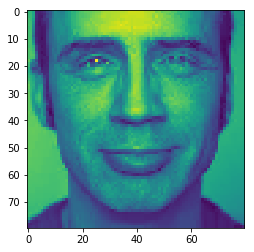

In [264]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8jZt21t_9H-4XHbcbpx453SAMj9GLJz6rvAf2ycE7CRWDq9Zl6Q")

The image is:  HAPPINESS


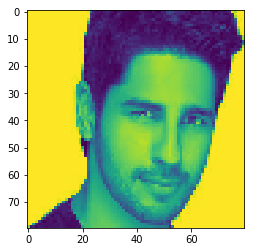

In [265]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkwuRBsjjLSV1UGgjF1LMjqWNRacI1HrUSoter0ApoBznswwAY1Q")

The image is:  HAPPINESS


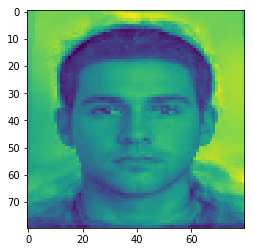

In [266]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2CiB2t-5iV-WizK8JCLMMoVai8RYGSTdgl4rw7dXjVU9rlXd2Qg")

The image is:  NEUTRAL


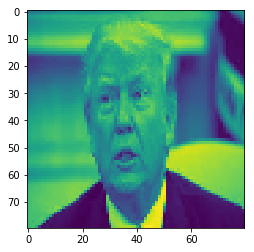

In [267]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOR7mOSb4ShRpT5CatOEnkMqwSdz9z3u5SCzcH4jufd4C0WMRsow")

The image is:  HAPPINESS


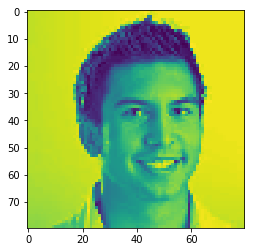

In [268]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcJdp8UGGEXi4ne_-hhNKOuzXGmrkOaDTVITl3An2Gy-TtEy2f")

The image is:  HAPPINESS


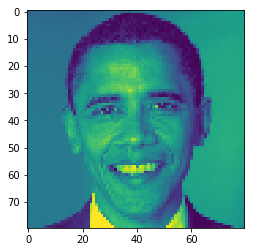

In [269]:
test_image("https://i.pinimg.com/originals/3f/40/69/3f40691c27a1f94ab2f79497ed3aebb1.jpg")

The image is:  FEAR


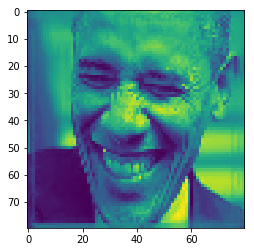

In [270]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbo7qhfawDt_1tYBO0pOMM7WLHGhyjtA3JpMfhp88GBII27Z9c")

The image is:  HAPPINESS


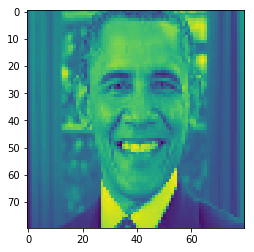

In [271]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrtm12fpK9P28zmPW2eFHvWceg5gv2-X3JebeXsOh9FVdox7g8tQ")

The image is:  ANGER


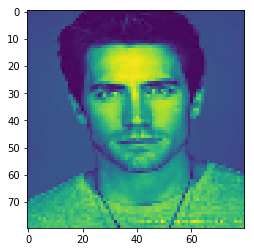

In [24]:
test_image("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSEhIVFhUVFxgYFxcYFRgXFRcWFxgWFxUXGBUYHSggGBolGxUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAPQAzgMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAABAgMEBQYABwj/xAA7EAABAwIEAwUHAwMEAgMAAAABAAIRAyEEBRIxQVFhBiJxgZETMqGxwdHwI0JSFHLxM2KC4RUkBxai/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/APOwiuCUgSuhGEYQcAiUQFAzbFgN0NNzv0CCJmOMk6Wmw3P2VcuSiIQCFyVqOyJBsgQlNbM9EqqJMjipGDYASXbG3qgiliDADuYT9OrEtI/ym3Aeux5eKDnMHApGlAhcSg4hP4XElh2lMuKSg0OExjalhY8ipGlZdroMjdabD1NTQZuQgUAjCK5AmF0JSEIEkIQlFcgCK4JQQCEQFyj5jV00zzNggiZjmUdymb8XfQKtBHG5TKWwoCKc7IPpwnAOO3mue48UDbbJRPxQJ/JQcCgSXJ/X3Os/dNBq7UdkAcZXHZdCMoFHa+/0TSWRK7QgSgjC6EAUvLK+l45HdRVwMXQalrgbhKCh5U/U2VMCDl0IrkCCEEopJQKCK4IgIAouZUi5tuH4VMhRszq6aZjc2HnufSUGbCWwJCUxA5c9B8V1OiSbItHBbDIcoBaJG6DLjCP4NUzDZRWqbMPoV6Jguz9JsEiT+cFqsDl7IENA8Ag8jpdkq7tqZ8YUTF9l6zLlpjb0Xv8Ah8KBwS6uXNduBug+d8PkNRxjQb9FYN7FVz+0he9UcopNuGD0Sn4RvJB8+1eyNdttJ9LeuyZf2arAXavoKphmxsqjHYBpEaUHg2Iy1zTBGyg1KcGF6ln+WC8Dw8fssJm2E032vKCkK5O1GJshBd5H7h/u+gU+VRZXi9B0xIKvUBC5cuQJKCUUlAoJQQCKAqLmOHL2gcipaTVMNJ6FBk3iCRyJC4ILkEzCtlw8V6Ll+7Bwheb4Q3HivRMjdLRO6DXYOnMdVpcDQCo8uAELRYR+yCfRpJ4Ugkh3JOtHVBwpDkm30lIBSKjkECpR6KtxlLdXL3BV+MiEGWzHD6liO0eWQ0mF6HiXAyslnIDpBvZB5hXpclCdurPMmaXOHVVjkBY6CDyK1TRYeCya1dD3BPIICuXFBACkpRQKBYRCASggKMTYoBEIMrjKGh7m9beB2TKu+0OH92oP7T9Pr6qkQSMGbhb3JHlrmjmAsHl7ZqNHVbOnVh7I6BBvsNVNoWhwDiQFnMnbqEmwWowrmgAAoLSiCVKATGEdZSNYQcEioE4SISH1Qgj1GqFiKchO4rMKYN6jRHNwCpcT2mw7Z/VYY5EH5IIeOaWg2WQxD5c5XeY9ssLEPNjsQJ/wsliczpOqfpPDgd+ceBQZTtJQLKk8CqRbDtVS1Uyf4mVj0CmCSAtXT90eAWfyigHVBOwv9lo4QIKBCUUECUCiUECglBJCUECkUkJQQMZm2aLx0nzFwsqti9sgtiZBEc5WUxWGdTMOBCCRkw/VHgVe4zG+zIdEngqXImzV8lq6eTe2cC73W784KCvpZ7iXjVrMDg28dICW/thi2kFri3xufRWGLzOnRIoUqTXOHEibn5DqfRPY7s7iBULKtVo7jKjWt0Uw/URqAe4R3Rqv02QR8H/8lYxvvkOH9sfJbjsf28/qXezeIMT+HiqKl2MY3D1arcRrc2oQwWiowNabFv7gS4TcGNk3lbC3S/kYu3S4HkRsZ5iyD2JtUOZIXn3bTtDXpQ2kJk2AEk/9LbZI/VRnmFkO0mHmpA3kD16oPLMzoYt79VQ3dfSXS7yaJMKIzCQ7v1GN4mSbeML0vKcrHt/1cO80gdyQHVY2LpPu/wC0efJSMxydjX6qOHENqVHs7zWg+1F21GQSQDtB2jyDF4bJMNVZIxLJ42Ijz2CZxHZR9KoxzTIkXFwR4haDP8lpjCUKVIRVpj/UA0udqkls2JbJMeWyndlcprU2tbU2j0nggzWPwxdTeCLwsAQvYe0GG0k24Ly3F4T/ANj2fNw+KB/IMO+o7QwGSReLDkVcla7J8j/pix3B0eCyT3SSepQIKCJSUAKBRKSUCwiEAigUlJMrkC2ugypXanLvbMD2C7WF/wDxMGPWQoivMoxYFJ+r9rC3yJJ+6DD9nf8AUPgvVMppB1MDiV5exgpV7e4/3ft5L0jsziZAQN1OycP9q33gVpMBgCQPaAuINtUGOYE7cPRWeHveFY0R0QRPZkCwgBUOdVJF+HRafFGyyOd1O9pQaXs1iopAdFUZyQ6tvvuneztbuwo+cu78oJ9KhrjU42VnTwNt1UZTirwVo2Higr//AA7Z1G5QxFEAGFZPqQq3G1TBgSgxnak2mfz8C8/yqgKuYDVs0aukgCPmtx2rq6Qs12ayo13v0d1xfJd0AiEG2z/HtOGLmftsOdwQY9V50tN2jaaVMUjMzBvaBfZZlB0pJRQQApBSikoHAikhKCAohBGUBT+F3LeDhH2TCLXQQRwMoHcf2ecymah5THI7iFZdlcZsVYjEtrUjLrcuI6LMdnK0OLZ6IPVsHiVdYepKxWV1+C1GErW/6QS8W6ywOd1f1YHifNbqu6YtP0WFzZo9u8uMAR0ERZBe9nnyIAQzp5BgjZOdksVSidV0vtXiqIAc5wbzcSAB1KCuyyr+q0E2O3itpRFlhMPXpPdT9m8GXCI4hbmibIFYh1lT42tCscTUVFmVTeEGP7VVLeKV2CBFJ72m4eVG7QGfRZzLsQ9oeGuIBcZgxKDQdrcwFWoIMwO9/d+BUSC5BxQlFJKAFJSkECwlBJCKBSK5cg5FBFAVFwQ0ViJ4z5G6lJgt/UaeYj0QbDK8ULLUYDEbFYLB1It+cyr7DY/S3ULn8hBq62PaOPksb2mwzajtQcQdjHwsl1H1DfmLm/nA8kuhlz33IuTt8igqsiys02OfLmjjpNp8FY1Mp9u1wu4t5+EwAtJl2Wt9kWOILj+3UJ62UrD4VrPaGoQwOgCTEkCEGJydraFQEtMgESSTA6Lb4fNxAVTjctpm7XNI3tBO0D6Jo4SCIN4iPl9EF/XxAcJCosxxMfnql02VGb7EfZVOMrjVCCozO+r4LN4QWP8AcVos0qRTcbcb81n8K2GD19boHEEUEHIIoFACklKKSUDgSkgJQQKRQCKDgiuXICmMWYbqG7b/AHTyTVHdPggcwWKDhqmbfn0Wi7PRVNzssM9ns4cLtPwKvsnx/szI2P1QbbOMG5zf0iGxa7ZB57LM1244kN9o1rf9srWYPG6mR0TOmDI36IKbDdn8U4AiuCeoIMnldS//AK1i33qYkehJ+JVjWzF7BAaQf+P2UejmWJmfeE7RaPGEFZW7K1ptXqHrYcuis8o7Php/VrVHkXBLoA8hv5q5Y97my4R4/wDS4SDMoH8aWhsE7beELEYmpNQ9NvNXmd406SAsficVYR7xOw+CCDnmI1Sxs297w5JoKRi8PopmbuNyeajMMgeCArlyCDkCuQKAFAolJKBwJQQCUEBRQCKDly5FBy5cuQDDM1M087KHWpllrx8lPy+zj0KsKtAESRugcyPNu54W3/OC2WX4hhvI2XmOIwzqR1Nkt49PHpdWmWZh/utaR49eG6DdNIqmG7DwjhdWWHwIbtuL7D6KmyzEiCLCIiON7KdTxt45ARE/PmgsRihsRsqfMMYATccwombY+DIPGCdxaZKzea5rptOqRaN/LzQIz7MtXdEGT59ISsuy8++4XPDkEMly0l3tKoudh/EfdaB1JBQZrh9TCFl6FctOh23DpG4W3xdMXWRq0h7Zo5uPppKDjUHMeqJT7sBIgrQdn8ibVozVEkOIaZIJAtB53n0QZiUFbY/JtLnBjgYPumxjx29YVXWpOYYe0g8iI/AgQklGUkoHwlQgEUBXLlyDkUaTC4hrQSTsAJKvctyTvDXDjaQLtHQnifggogDBdFhueA81BqY0wSGxYmT0E7L0nNMqBw72sAnTsAPQBYnEYECm7qx0XjggR2dplwMmSVcV6RFlVdn3XnmVpa1PVBQQfY26FVWIytw9wx03HH03WnoUeBS6uEQZ2mMSI0s9CCIva5UoDGuv7J0CP3MiRuY1fkLQYbD2VhQZFkGQrZdiqlnFrB1MnhwHgn8LkgYZcS93M8PAcFqHUuajEXQNUacJcoVHJVJvFBBxjLLG1W/+00dHH5D6lbXGtlZX+n1VqtUbM0s8/fd8HNQWVGnIAtLoA8TYLa4bCCmxoAnQ0CObibn1JKpuy2ALv1nNgAQ2bXNpHyHmtDXDYImwuREy6LTCDNYrLg57jYvnzPnEKJXy8xDhqA/a4SPI8PJXbnQJ1RPDxtsQI2Sw6bXHg0X9EGKxWV0j7uqkesuZ8e8PG/gqupllUbMLurO8Pht5r0N2GB7pAPnb47FQq+XMmzR5b+cIMQAuQlWOAyepVGqzGfzdYeQ3KCvlT8Hlb3w50sZ/Ii56NHH5K4weWU6Z7o9o4fvcO6D0be/irClhi9xc4ydrX9SgZwOCaBpY3S3iZ77o/kRw6Cys8twxDpNheOJPOOvVPU6QDY+Xy5lSGUiGkgGYnjbogsaYBBgHa/1usP2kwGh5gdx86R1jb1uFs8NWgbmTb/Hgmc4y9tancbXB5OFpibg8UHmPZ2nYN/iS0+RhbOlSBastToGhitLhArNkHgXtEW8Wj4FbLCssgjU6d1LLZCkHDWskGnFkDFEXT5fCjmxSajuqCTUqKMkAFP0KUoG6VHUVLdR4KXhsPpEpuu6+/h18EFLj3NaxznGA0EmekqL2dyoupsc8QHODnA31OedRHVoEjyCnZrg/a1cPh3CPav1vbzo0ru1HgHPNNscQStFVj2jGwIaCQAIAtAtG1ygcNLS2GwOXIC3/AFZR3Uxed+Yjz2TlfWP2yTf+Xw4eSaeDpANz0kb7II9fDbAyLW2+yjMowd+Fie6elh+WTtZpbNgDexJ3tsSk0HO4mLRw+uyBv2c7O+ZE9bqMaLtRIIHqPTopOkcABz2KaGseu0/G6DP5VkrANT4e4cf2N8AfePU26Kf7xiQQNyYT4E2uAnXWER8PsgTTomO77o9JspjKcM06R1M7z0CTRA2Ej5z5qQ+g50AugcBe08+qBFNocbNAtw4c7CyfqEkaQbWuPj4LqVAMieItfnxjdONPHbYy7aeUhA5hRYlwtz2UpsEENPEmOHHb7Hfoo7SDf5xHiPinqFbgAD0iB0M8OfkgpM9y3+pw7mCPa070nbFr2y5m2wMQRyOyVkZFWkypTktI90wHtds5h4SCCDtcK2oACq4WGtoHgQTb0PwVfhqZw+IcwCKdb9Rl+6Kkn2gBFhPdd4l6CUDe4I6FOOoghTXQ4QYI5ET4Qmjhw3+Q8/oUFNXoEKFUtvsr3E4UuHdefQH7Ks/8A5zpdXMcgwAjzJsghtrDi6FNweJpzDXajyFyU9huytBvedrfH8nQPMCB5K3w+EYwQxoaOTWw3iUEZrXOsRpHiCY58vml0qIEkW3JJ6cz8vFSXxcSPDw+ZVTnWN9nQqPFyBZvFz9mNvzdAvzQV/ZwivisRiN2s04ekdu6yXVDfm9xb10K8Y8e0edwIbxkWk7HqPQKNkuD/psOxjTJa2XGI1ON3vMnckk+adwJJZqmC6/MwdtrbIHDXaXWBA/kR8k26DFrTz/x8k6W6gQ4nzv8CmxhgBpaIP8ALflzQM4i9ixseIJ6RumWafdIBjhqm/CCpRwrR+6/S32TYpQ+wE84ugQ5rTeADtwTT6IO/wCerlJq0Wk6rTttt4JsUgeMDofyUEFmFnZ0H6ck57GI7oPqSfPhdJ23n6KXhmmwtAvt+T5oG3U5G0eceoTjaZiBHWB8J4/lk/7MG/09IGwRFO+qY5fXj8UDBtF/ID8AKVUqbbWtJgkeMW8k57IGCTx42HHgAjA5gfT78UDWHo8xMcxa83jayfcY951/D6pJpTEk+kespb2m0W8Gx0vHmgjYh7mw6QACDPMdLc0nNv1KfdI1sIczeNTTYTxkSD0JTlbDAghxN5E6jx6QkYUt0CSBwPEyLFA7gMa2qxtVrjDmiADcHiCOY2I5qSyqRsDyvI+M/RZvBVv6fFGgY9nWmrSsLPn9VkDnIf5uV/WebWt4wEDrqx/iZ+XqEW1ztp9THTyUU1Z1QQe6YkWDuFwnv0gXFzzpEkCQf3O2OmYIDbbiePAHf6hx4NtydKL3EgyeVvsUin7HmAQCLuJmahiCQYhoueTgYsU411IvHfESNUuEe83U2zb21cpjggYkTdvjJvPhCg4uo6piKVHS3Q39V9ibNMMBnbvHUOtNWRLQJBaTpuSbB3IiBA6zvE8VV9n6FKrUqV21CRUeWAz3Q2m6s0FrSPcIax0yf9V14EALLHU+66BE2nVH/wCY8EmjTDQGyDw3E22SqbWE94tgEmCTZobLSQ0X71tgTBgiIJoU2AXO5fDv3AQ3REG99U+fRAalRu8b2tHTYIGptDTfnb5IYllO/ecSJABi502NhESCDxkt2ThpUhYucRYnvE7TPC8xY23QMtcALtgcZ5+ZvwTbyBHd/Okp7RTgS2dOsxcyIfpAJs6CKcbTqPJJeWkwWgAPfBuDoECmJM89+HFBHLuBHxjmm9f8mh3oI+ClaKe5O8WBF73vptE/8txCaruAgtkggcRY8RNp9EEWk63C33Trd45wiuQTAzje0/AD7qMH7GOfwXLkCqjoHUnfinaLJbJueviguQGfzzA+RQq2IAO65cgMXiSoNA/qPbwsfWZ+S5cgqO2Jigags+i5tRh5ODgD5EEgjkVdMfLbwVy5BHbWOuIFjyVgGS3c/D6hFcgYqMBub/4lOF1w2BG+y5cgq+1mIczBV6jTpcGOiLRYifFWeVYJlPD02MENDQAOEADfmguQRnVoe6ws4N47ANPP/cfQKZRqHnFhYQN1y5A6+wJHL7/ZR8K4uLgeHHiZ5oLkCqnvRCULmOccuqK5AxMOjmU+TFoFkVyD/9k=")

The image is:  HAPPINESS


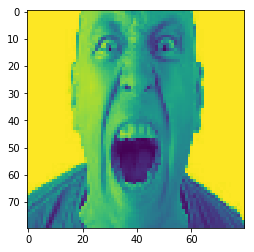

In [25]:
test_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9wxc0-wUYs5HZpmxdswEaMnWT6pY20kIeVF95feZvs-EP49JRHA")